#Comparison of Model Fits: HRS

This notebook compares the fits and best fit parameters for each model fitting to see the systematic differences based on which model is used. The three models are from Casey 2012, Mullaney et al 2011 (DecompIR), and Dale et al 2014.

The main things I want to compare is the total IR luminosity, AGN fraction, and component luminosities.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(context='notebook', style='darkgrid', color_codes=True, palette='deep')

In [25]:
# Upload the fitting results for each model
hrs_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/hrs_beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_hrs.csv', index_col=0)
hrs_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/hrs_sb+arp220/final_fit_results_decompir_sb_and_arp220_hrs.csv', index_col=0)
hrs_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/hrs/final_fit_results_dale14_hrs.csv', index_col=0)

# The Casey fits file has indices that is just the HRS number without the HRS in front. We need to adjust the index for this DataFrame.
hrs_casey.index = ['HRS'+str(x) for x in hrs_casey.index.values]
hrs_casey.sort(inplace=True)
hrs_decompir.sort(inplace=True)
hrs_dale14.sort(inplace=True)


First lets compare the total IR luminosity integrated from 8-1000 micron. This will give us an idea of the systematic differences in the SFR based on the model used.

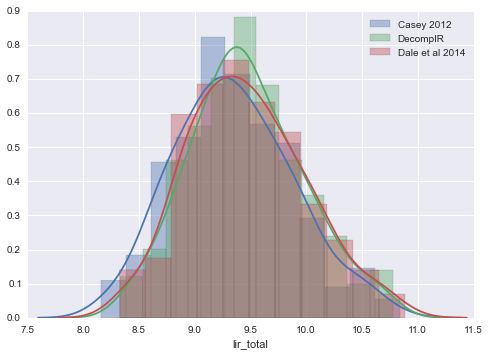

In [14]:
sn.distplot(hrs_casey['lir_total'])
sn.distplot(hrs_decompir['lir_total'])
sn.distplot(hrs_dale14['lir_total'])
plt.legend(['Casey 2012', 'DecompIR', 'Dale et al 2014'])

In general based on the distribution it looks like all 3 models give fairly consistent total IR luminosity. It looks like DecompIR gives slightly higher luminosity by maybe 0.2 dex. 

In [15]:
hrs_casey['lir_total'].describe()

count    245.000000
mean       9.350147
std        0.532379
min        8.159468
25%        8.960053
50%        9.304950
75%        9.710545
max       10.836099
Name: lir_total, dtype: float64

In [16]:
hrs_decompir['lir_total'].describe()

count    245.000000
mean       9.468162
std        0.503231
min        8.331411
25%        9.132852
50%        9.424267
75%        9.769820
max       10.772164
Name: lir_total, dtype: float64

In [18]:
hrs_dale14['lir_total'].describe()

count    245.000000
mean       9.465206
std        0.523732
min        8.325753
25%        9.063336
50%        9.431896
75%        9.803154
max       10.883914
Name: lir_total, dtype: float64

In terms of the mean IR luminosity, actually the Dale+14 and DecompIR models give consistent luminosities. The Casey 2012 model gives slightly lower luminosities by about 0.1 dex.

This is only a statistical comparison, lets see how they do on an individual source basis.

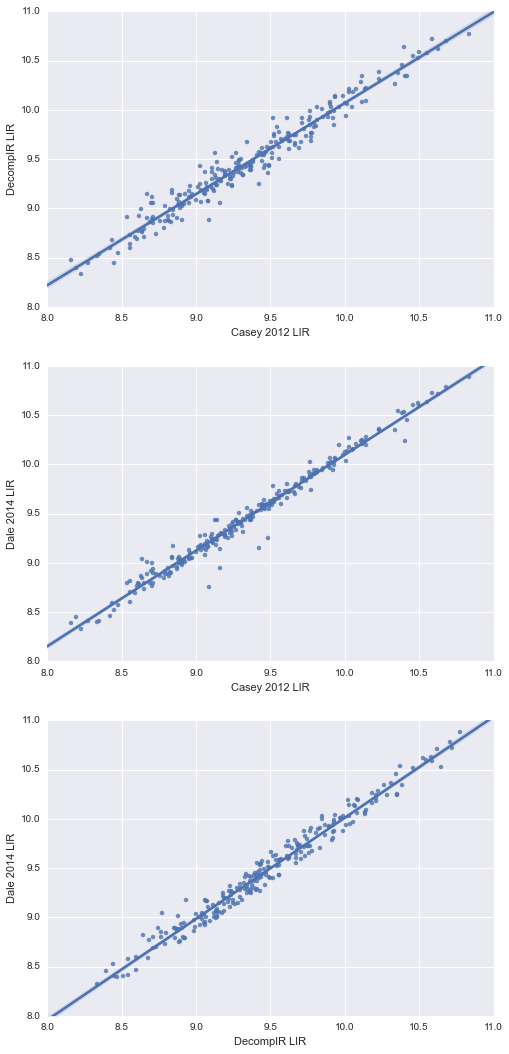

In [30]:
fig = plt.figure(figsize=(8, 18))
ax1 = fig.add_subplot(311)
sn.regplot(hrs_casey['lir_total'], hrs_decompir['lir_total'], ax=ax1)
ax1.set_xlim(8.0, 11.0)
ax1.set_ylim(8.0, 11.0)
ax1.set_xlabel('Casey 2012 LIR')
ax1.set_ylabel('DecompIR LIR')

ax2 = fig.add_subplot(312)
sn.regplot(hrs_casey['lir_total'], hrs_dale14['lir_total'], ax=ax2)
ax2.set_xlim(8.0, 11.0)
ax2.set_ylim(8.0, 11.0)
ax2.set_xlabel('Casey 2012 LIR')
ax2.set_ylabel('Dale 2014 LIR')

ax3 = fig.add_subplot(313)
sn.regplot(hrs_decompir['lir_total'], hrs_dale14['lir_total'], ax=ax3)
ax3.set_xlim(8.0, 11.0)
ax3.set_ylim(8.0, 11.0)
ax3.set_xlabel('DecompIR LIR')
ax3.set_ylabel('Dale 2014 LIR')

Based on my visual interpretation, they all look quite correlated. The relationship with the least scatter though seems to be between the Casey and Dale fits. 

We can do a quick linear regression between each model to see what the slope, intercept, and scatter is around each relationship.

In [32]:
from scipy.stats import linregress

In [34]:
casey_decompir_linregress = linregress(x=hrs_casey['lir_total'], y=hrs_decompir['lir_total'])
casey_dale14_linregress = linregress(x=hrs_casey['lir_total'], y=hrs_dale14['lir_total'])
decompir_dale14_linregress = linregress(x=hrs_decompir['lir_total'], y=hrs_dale14['lir_total'])

In [38]:
print 'Casey vs DecompIR:'
print 'Slope: ', casey_decompir_linregress[0]
print 'Intercept: ', casey_decompir_linregress[1]
print 'R-Squared: ', casey_decompir_linregress[2]**2
print 'P-value: ', casey_decompir_linregress[3]
print 'Standard Error: ', casey_decompir_linregress[4]
print ''
print 'Casey vs Dale14:'
print 'Slope: ', casey_dale14_linregress[0]
print 'Intercept: ', casey_dale14_linregress[1]
print 'R-Squared: ', casey_dale14_linregress[2]**2
print 'P-value: ', casey_dale14_linregress[3]
print 'Standard Error: ', casey_dale14_linregress[4]
print ''
print 'DecompIR vs Dale14:'
print 'Slope: ', decompir_dale14_linregress[0]
print 'Intercept: ', decompir_dale14_linregress[1]
print 'R-Squared: ', decompir_dale14_linregress[2]**2
print 'P-value: ', decompir_dale14_linregress[3]
print 'Standard Error: ', decompir_dale14_linregress[4]

Casey vs DecompIR:
Slope:  0.925321800579
Intercept:  0.816266481595
R-Squared:  0.95828292304
P-value:  1.21899349669e-169
Standard Error:  0.0123851057256

Casey vs Dale14:
Slope:  0.97262067813
Intercept:  0.37105936727
R-Squared:  0.977489341997
P-value:  3.37876798022e-202
Standard Error:  0.00946844021446

DecompIR vs Dale14:
Slope:  1.02698518116
Intercept:  -0.258455697056
R-Squared:  0.973744970155
P-value:  4.45389993572e-194
Standard Error:  0.0108179428974


Indeed the Casey vs. Dale14 correlation has the smallest standard error meaning there is much better correspondence between the two IR luminosities. This relationship also has a the largest r-squared. 

The worst relationship is between Casey and DecompIR which has a slope of only 0.92 and standard error of 0.012. 

Of course all three relationships have pretty good linear relationships with r-squareds above 95% and tiny p-values. 

Next I want to look at the correlations of the AGN fraction.

In [40]:
hrs_casey['agn_frac'] = (10**(hrs_casey['lir_powlaw']) - 1./3.*10**(hrs_casey['lir_bb']))/(10**(hrs_casey['lir_total']))

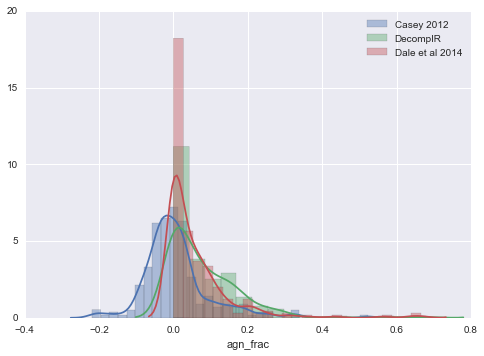

In [41]:
sn.distplot(hrs_casey['agn_frac'])
sn.distplot(hrs_decompir['agn_frac'])
sn.distplot(hrs_dale14['agn_frac'])
plt.legend(['Casey 2012', 'DecompIR', 'Dale et al 2014'])

Clearly there are some sources with the Casey model that have negative AGN fraction. Let's assume all of these sources have 0 AGN fraction.

In [42]:
hrs_casey.loc[(hrs_casey['agn_frac'] < 0), 'agn_frac'] = 0

(0.0, 0.2)

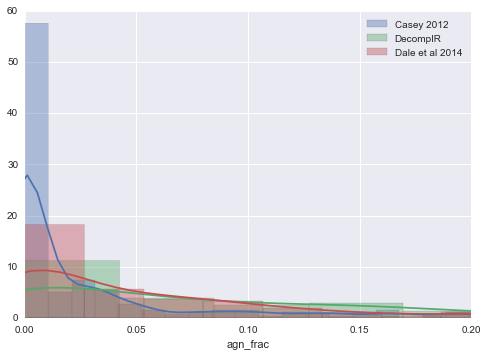

In [50]:
sn.distplot(hrs_casey['agn_frac'])
sn.distplot(hrs_decompir['agn_frac'])
sn.distplot(hrs_dale14['agn_frac'])
plt.legend(['Casey 2012', 'DecompIR', 'Dale et al 2014'])
plt.xlim(0.0, 0.2)

Interestingly it looks like the Casey model has more sources at low AGN fraction for the HRS sample. I'm not sure what this means but it seems like the DecompIR and Dale 2014 models might be overestimating the AGN fraction compared to the Casey model??

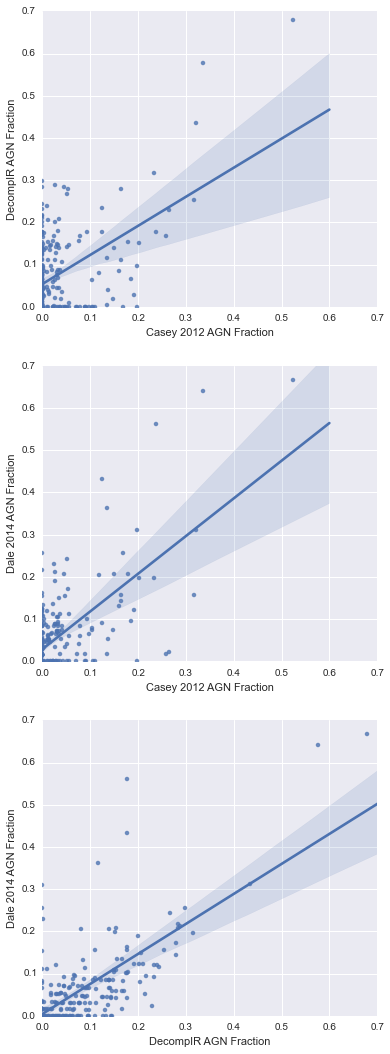

In [54]:
fig = plt.figure(figsize=(6, 18))
ax1 = fig.add_subplot(311)
sn.regplot(hrs_casey['agn_frac'], hrs_decompir['agn_frac'], ax=ax1)
ax1.set_xlim(0, 0.7)
ax1.set_ylim(0, 0.7)
ax1.set_xlabel('Casey 2012 AGN Fraction')
ax1.set_ylabel('DecompIR AGN Fraction')

ax2 = fig.add_subplot(312)
sn.regplot(hrs_casey['agn_frac'], hrs_dale14['agn_frac'], ax=ax2)
ax2.set_xlim(0, 0.7)
ax2.set_ylim(0, 0.7)
ax2.set_xlabel('Casey 2012 AGN Fraction')
ax2.set_ylabel('Dale 2014 AGN Fraction')

ax3 = fig.add_subplot(313)
sn.regplot(hrs_decompir['agn_frac'], hrs_dale14['agn_frac'], ax=ax3)
ax3.set_xlim(0, 0.7)
ax3.set_ylim(0, 0.7)
ax3.set_xlabel('DecompIR AGN Fraction')
ax3.set_ylabel('Dale 2014 AGN Fraction')

It looks like the DecompIR and Dale 2014 AGN fractions agree the best. Lets look at the differences between each AGN fractions.

In [56]:
diff_casey_decompir = hrs_casey['agn_frac'] - hrs_decompir['agn_frac']
diff_casey_dale = hrs_casey['agn_frac'] - hrs_dale14['agn_frac']
diff_decompir_dale = hrs_decompir['agn_frac'] - hrs_dale14['agn_frac']

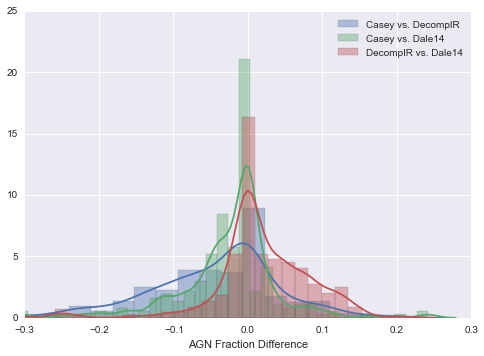

In [63]:
sn.distplot(diff_casey_decompir)
sn.distplot(diff_casey_dale)
sn.distplot(diff_decompir_dale)
plt.legend(['Casey vs. DecompIR', 'Casey vs. Dale14', 'DecompIR vs. Dale14'])
plt.xlim(-0.3, 0.3)
plt.xlabel('AGN Fraction Difference')

It looks like all 3 distributions peak at 0 which is good. However there are clear trends shown by the tails in the distributions. The Casey model gives lower AGN fractions than the DecompIR model. The DecompIR model gives higher AGN fractions than the Dale model. And the Dale model gives higher AGN fractions than the Casey model. 

So clearly it looks like DecompIR is possibly overestimating the AGN fraction for the HRS.

In any case I think this shows that the models aren't perfect. Certainly not all of these HRS galaxies actually contain an AGN but since we're only using two data points to constrain the MIR powerlaw component, its easy to mimic the need for one.

In [66]:
diff_casey_decompir.describe()

count    2.450000e+02
mean    -4.326357e-02
std      8.513499e-02
min     -2.990684e-01
25%     -9.211583e-02
50%     -2.765220e-02
75%     -1.240000e-12
max      1.986560e-01
Name: agn_frac, dtype: float64

In [67]:
diff_casey_dale.describe()

count    245.000000
mean      -0.025108
std        0.071646
min       -0.325118
25%       -0.047400
50%       -0.013200
75%        0.000000
max        0.242174
Name: agn_frac, dtype: float64

In [69]:
diff_decompir_dale.describe()

count    2.450000e+02
mean     1.815574e-02
std      7.182306e-02
min     -3.848213e-01
25%      8.100000e-15
50%      5.011438e-03
75%      5.780390e-02
max      2.069128e-01
Name: agn_frac, dtype: float64

Essentially for all three models the median difference is at most 3%. It will be interesting to see if the same holds when we test a sample where every source contains an AGN.

In the end I think we can say that all three models give consistent estimates for the IR luminosity with the largest differences seen between the Casey and DecompIR models. 